Deliverable 3: Pre-processing Data

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
url = "https://raw.githubusercontent.com/laurlen2112/neural_network_charity_analysis-/main/charity_data.csv"
application_df = pd.read_csv(url)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'**** may need to drop more***
app_df = application_df.drop(["EIN", "NAME"], axis = 1)
app_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column (19.4.3)
app_cat = app_df.dtypes[app_df.dtypes == "object"].index.tolist()
app_df[app_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at INCOME_AMT value counts for binning since it is near a value of 10
income_bin = app_df["INCOME_AMT"].value_counts()
income_bin

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

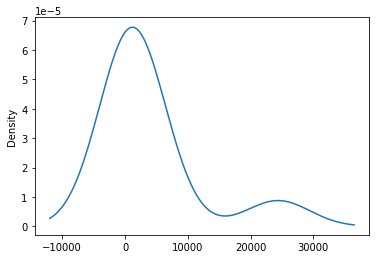

In [5]:
# Visualize the value counts of INCOME_AMT(19.3.3)
income_bin.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...? (19.3.3)
replace_income = list(income_bin[income_bin <600].index)

# Replace in dataframe
for app in replace_income:
    app_df.INCOME_AMT = app_df.INCOME_AMT.replace(app,"Other")
    
# Check to make sure binning was successful
app_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             1107
1M-5M              955
1-9999             728
Name: INCOME_AMT, dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_bin = app_df["APPLICATION_TYPE"].value_counts()
application_bin

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Determine which values to replace if counts are less than ...? (19.3.3)
replace_application = list(application_bin[application_bin <500].index)

# Replace in dataframe
for app in replace_application:
    app_df.APPLICATION_TYPE = app_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
app_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning 
app_class_bin = app_df["CLASSIFICATION"].value_counts()
app_class_bin

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# Determine which values to replace if counts are less than ..?
replace_app_class = list(app_class_bin[app_class_bin <1000].index)

# Replace in dataframe
for cls in replace_app_class:
    app_df.CLASSIFICATION = app_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
app_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists (19.4.3)
app_cat = app_df.dtypes[app_df.dtypes == "object"].index.tolist()
app_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(app_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals (19.3.3)

new_app_df = app_df.merge(encode_df, left_index = True, right_index = True)
new_app_df = new_app_df.drop(columns = app_cat, axis = 1 )
new_app_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays (19.4.3)
y = new_app_df["IS_SUCCESSFUL"].values
x = new_app_df.drop(["IS_SUCCESSFUL"], axis = 1).values

# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=78)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [16]:
# Import checkpoint dependencies (19.6.1)
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Optimization Attempt 1: Use tanh activation

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer(19.4.4)
number_input_features = len(x_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 7,161
Trainable params: 7,161
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Create a callback that saves the model's weights every epoch (19.6.1)
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5)

# Train the model (19.4.5)
fit_model = nn.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 6s 5ms/step - loss: 0.5733 - accuracy: 0.7179
Epoch 2/100
804/804 [==============================] - 4s 6ms/step - loss: 0.5580 - accuracy: 0.7285
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5541 - accuracy: 0.7285
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5523 - accuracy: 0.7294
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5509 - accuracy: 0.7307
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7311
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5488 - accuracy: 0.7305
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5483 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7328
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accura

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5552 - accuracy: 0.7251 - 561ms/epoch - 2ms/step
Loss: 0.5552102327346802, Accuracy: 0.7251312136650085


Optimization Attempt 2: add additional layers

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer(19.4.4)
number_input_features = len(x_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3280      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,351
Trainable params: 6,351
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Create a callback that saves the model's weights every epoch (19.6.1)
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5)

# Train the model (19.4.5)
fit_model = nn.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5712 - accuracy: 0.7178
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5559 - accuracy: 0.7288
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7306
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7312
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7326
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7329
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5493 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7326
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accura

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5542 - accuracy: 0.7258 - 517ms/epoch - 2ms/step
Loss: 0.5541614294052124, Accuracy: 0.7258309125900269


Optimization Attempt 3: Add Neurons

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer(19.4.4)
number_input_features = len(x_train_scaled[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 120)               4920      
                                                                 
 dense_8 (Dense)             (None, 40)                4840      
                                                                 
 dense_9 (Dense)             (None, 1)                 41        
                                                                 
Total params: 9,801
Trainable params: 9,801
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Create a callback that saves the model's weights every epoch (19.6.1)
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5)

# Train the model (19.4.5)
fit_model = nn.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5687 - accuracy: 0.7221
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5576 - accuracy: 0.7277
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7298
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7303
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5508 - accuracy: 0.7309
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5495 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7324
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7329
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5478 - accura

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5570 - accuracy: 0.7245 - 455ms/epoch - 2ms/step
Loss: 0.556982696056366, Accuracy: 0.7245481014251709


In [29]:
# Export our model to HDF5 file
nn.save("trained_attrition.h5")